# Final Project : Predict Churning Customers

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

This dataset is from a website with the URL as https://leaps.analyttica.com/home. Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

From this data set we can predict the customers who are going to stop using credit cards. Using this model/result, the company can make offer to employess to retain them.

## Attribute Information

* **CLIENTNUM**                : Client number. Unique identifier for the customer holding the account
* **Attrition_Flag**           : Internal event (customer activity) variable - if the account is closed then 1 else 0
* **Customer_Age**             : Customer's Age in Years
* **Gender**                   : M=Male, F=Female
* **Dependent_count**          : Number of dependents
* **Education_Leel**           : Educational Qualification of the account holder (example: high school, college graduate, etc.)
* **Marital_status**           : Married, Single, Divorced, Unknown
* **Income _Category**         : Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >
* **Card_Category**            : Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
* **Months_On_Book**           : Period of relationship with bank
* **Total_Relationship_Count** : Total no. of products held by the customer
* **Months_Inactive_12_mon**   : No. of months inactive in the last 12 months
* **Contacts_Count_12_mon**    : No. of Contacts in the last 12 months
* **Credit_Limit**             : Credit Limit on the Credit Card                                                                                                           
* **Total_Revolving_Bal**      : Total Revolving Balance on the Credit Card
* **Avg_Open_To_Buy**          : Open to Buy Credit Line (Average of last 12 months)
* **Total_Amt_Chng_Q4_Q1**     : Change in Transaction Amount (Q4 over Q1)
* **Total_Trans_Amt**          : Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct**           : Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1**      : Change in Transaction Count (Q4 over Q1)
* **Avg_Utilization_Ratio**    : Average Card Utilization Ratio

## Import Dataset
Import Dataset from local computer. Before doing it, we need to import packages as following :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.style.use('classic')
sns.set()
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
pd.set_option('display.max_columns', 6)
df = pd.read_csv('D:/Material Lacture S2/3 Third Semester/Data Mining Methods/Final Project/BankChurners.csv')
df.drop(df.columns[[-1,-2]], axis=1, inplace=True) # Drop 2 last columns
print(df.shape)
df.head(5)

(10127, 21)


,CLIENTNUM,Attrition_Flag,Customer_Age,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,...,42,1.625,0.061
1,818770008,Existing Customer,49,...,33,3.714,0.105
2,713982108,Existing Customer,51,...,20,2.333,0.000
3,769911858,Existing Customer,40,...,20,2.333,0.760
4,709106358,Existing Customer,40,...,28,2.500,0.000


Here we can see that our data consist on **10,127 observation with 21 features**, the features names mantion down below,

In [5]:
# Show all names of features 
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## Exploratory Data Analysis
before modeling data, we would like to explore and vizualize them so that we can understand what kinds of data we have.

In [6]:
print(df.dtypes)

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


as you can see that types of features are such as **Object, Integer and Float**. First of all, we would like to vizualize features with object types. Down there are code for making pie chart and bar chart in order to get  insight from **Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category and Card_Category.**  

Text(0.5, 1.0, 'Proportion of Card_Category')

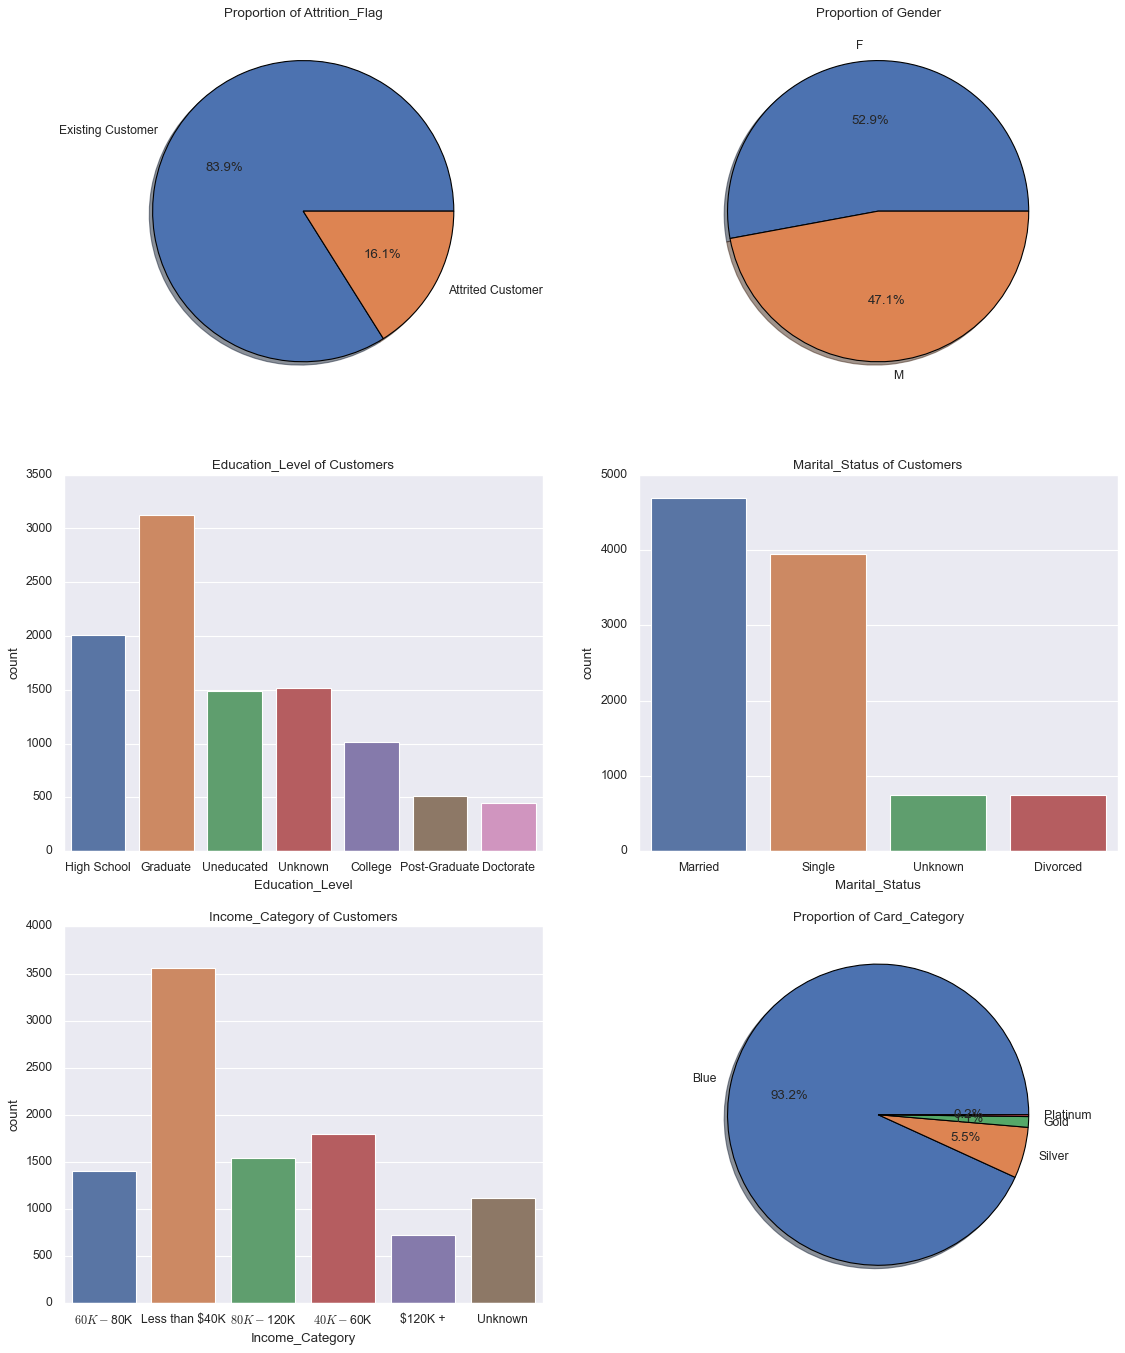

In [7]:
fig = plt.figure(constrained_layout=False, figsize=(17, 20))
spec = gridspec.GridSpec(ncols=2, nrows=3, figure = fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[1, 0])
ax4 = fig.add_subplot(spec[1, 1])
ax5 = fig.add_subplot(spec[2, 0])
ax6 = fig.add_subplot(spec[2, 1])

# Attrition_Flag
labels = df['Attrition_Flag'].value_counts().keys()
ax1.pie(df['Attrition_Flag'].value_counts(),labels = labels,  autopct='%.1f%%',
        shadow=True, wedgeprops={'edgecolor': 'black'})
ax1.set_title('Proportion of Attrition_Flag')

# Gender
labels = df['Gender'].value_counts().keys()
ax2.pie(df['Gender'].value_counts(),labels = labels,  autopct='%.1f%%',
        shadow=True, wedgeprops={'edgecolor': 'black'})
ax2.set_title('Proportion of Gender')

# Education_Level
sns.countplot(ax=ax3, x=df['Education_Level'])
ax3.set_title('Education_Level of Customers')

# Marital_Status 
sns.countplot(ax=ax4, x=df['Marital_Status'])
ax4.set_title('Marital_Status of Customers')

# Income_Category 
sns.countplot(ax=ax5, x=df['Income_Category'])
ax5.set_title('Income_Category of Customers')              

# Card_Category                 
labels = df['Card_Category'].value_counts().keys()
ax6.pie(df['Card_Category'].value_counts(),labels = labels,  autopct='%.1f%%',
        shadow=True, wedgeprops={'edgecolor': 'black'})
ax6.set_title('Proportion of Card_Category')

based on charts above, we got proportion of Attrition_Flag 83.9% existing and 16.1% attrited customer. If we look from Gender, most of the customer are female 52.0%. They were also having Graduate and got merried in majority. Thus, according to income category, the customer has mostly less than 40,000 USD in a year. We can see also that more than 93% they hold blue card.

In [8]:
df.select_dtypes(include='float64').describe()

,Credit_Limit,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,8631.953698,7469.139637,0.759941,0.712222,0.274894
std,9088.776650,9090.685324,0.219207,0.238086,0.275691
min,1438.300000,3.000000,0.000000,0.000000,0.000000
25%,2555.000000,1324.500000,0.631000,0.582000,0.023000
50%,4549.000000,3474.000000,0.736000,0.702000,0.176000
75%,11067.500000,9859.000000,0.859000,0.818000,0.503000
max,34516.000000,34516.000000,3.397000,3.714000,0.999000


here we consider to calculate summary statistics towards numeric features such as **Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1 and Avg_Utilization_Ratio**. We can interpret Credit_Limit as that feature has mean 8631.953698 less than standar deviation 9088.776650, which mean that the data has high volatility and it happens to Avg_Open_To_Buy as well.

In [9]:
df.groupby('Attrition_Flag')[df.select_dtypes(include='float64').columns].describe().T

Attrition_Flag               Attrited Customer  Existing Customer
Credit_Limit          count        1627.000000        8500.000000
                      mean         8136.039459        8726.877518
                      std          9095.334105        9084.969807
                      min          1438.300000        1438.300000
                      25%          2114.000000        2602.000000
                      50%          4178.000000        4643.500000
                      75%          9933.500000       11252.750000
                      max         34516.000000       34516.000000
Avg_Open_To_Buy       count        1627.000000        8500.000000
                      mean         7463.216472        7470.273400
                      std          9109.208129        9087.671862
                      min             3.000000          15.000000
                      25%          1587.000000        1184.500000
                      50%          3488.000000        3469.500000
                      75%          9257.500000        9978.250000
                      max         34516.000000       34516.000000
Total_Amt_Chng_Q4_Q1  count        1627.000000        8500.000000
                      mean            0.694277           0.772510
                      std             0.214924           0.217783
                      min             0.000000           0.256000
                      25%             0.544500           0.643000
                      50%             0.701000           0.743000
                      75%             0.856000           0.860000
                      max             1.492000           3.397000
Total_Ct_Chng_Q4_Q1   count        1627.000000        8500.000000
                      mean            0.554386           0.742434
                      std             0.226854           0.228054
                      min             0.000000           0.028000
                      25%             0.400000           0.617000
                      50%             0.531000           0.721000
                      75%             0.692000           0.833000
                      max             2.500000           3.714000
Avg_Utilization_Ratio count        1627.000000        8500.000000
                      mean            0.162475           0.296412
                      std             0.264458           0.272568
                      min             0.000000           0.000000
                      25%             0.000000           0.055000
                      50%             0.000000           0.211000
                      75%             0.231000           0.529250
                      max             0.999000           0.994000

We may compare between Attrited Customer and Existing Customer based on Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1 and Avg_Utilization_Ratio. As you can see above that those two categories have no much difference coresponding to mean and standar deviation. for example, mean of Attrited Customer is 7463.216472 (std: 9109.208129) and mean of Attrited Customer 7470.273400 (std: 9087.671862), and so are other features.

<AxesSubplot:title={'center':'Avg_Utilization_Ratio'}, xlabel='[Income_Category]'>

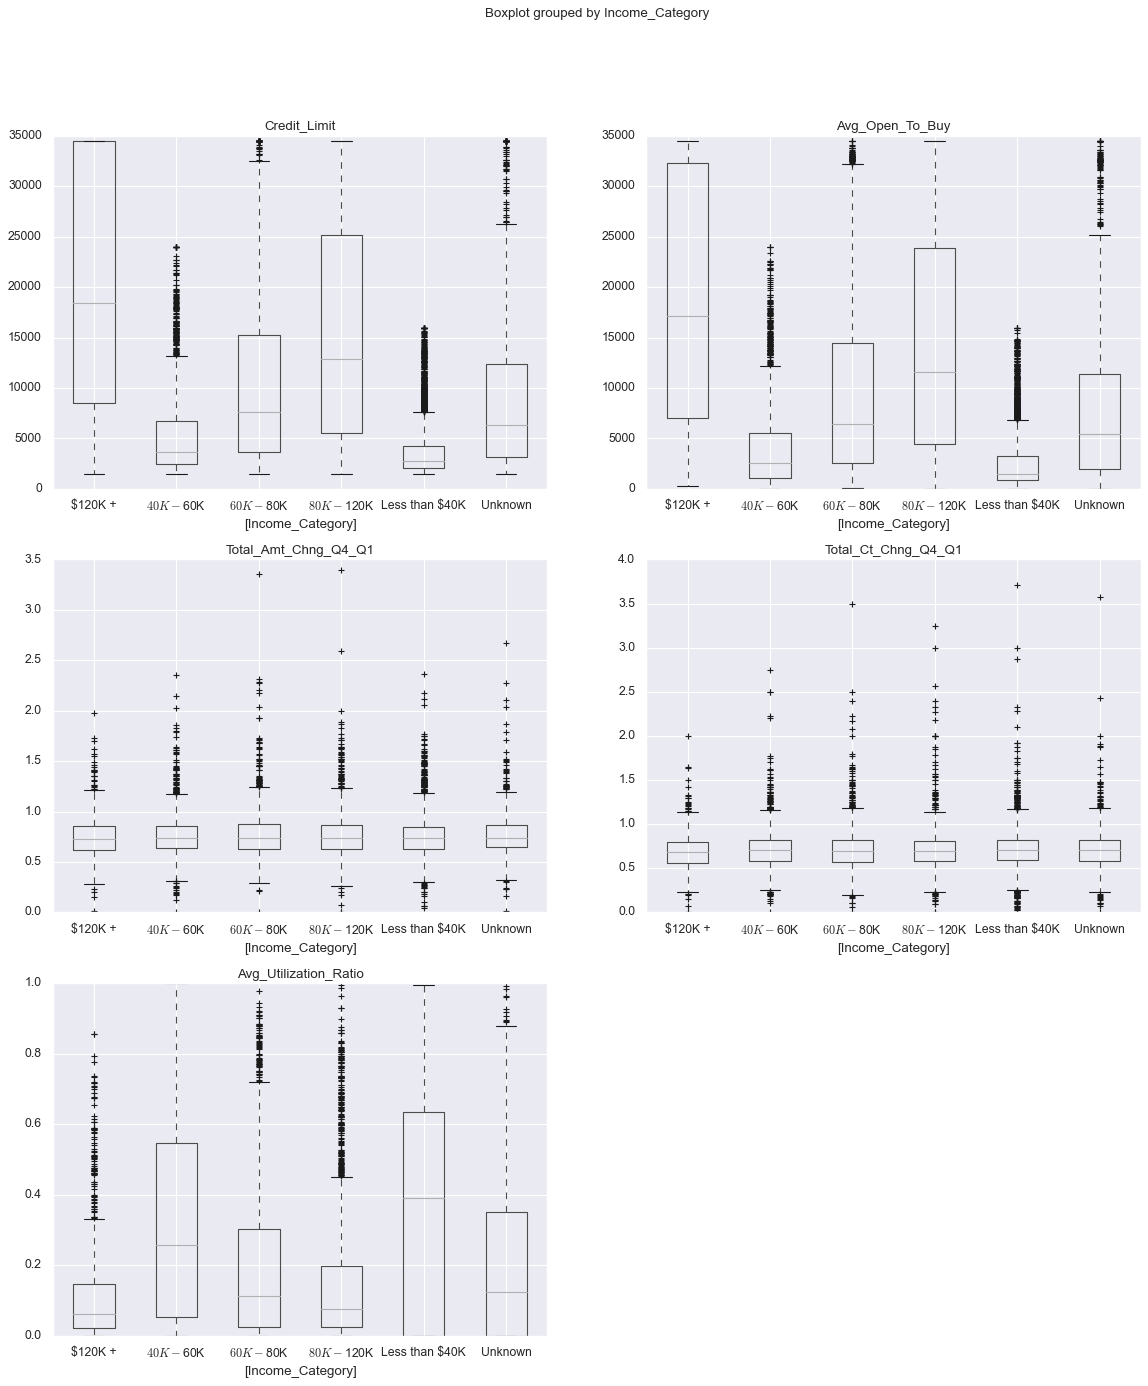

In [10]:
fig = plt.figure(figsize=(17, 20))
spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[1, 0])
ax4 = fig.add_subplot(spec[1, 1])
ax5 = fig.add_subplot(spec[2, 0])

df.boxplot(column=['Credit_Limit'], by=['Income_Category'], ax=ax1)
df.boxplot(column=['Avg_Open_To_Buy'], by=['Income_Category'], ax=ax2)
df.boxplot(column=['Total_Amt_Chng_Q4_Q1'], by=['Income_Category'], ax=ax3)
df.boxplot(column=['Total_Ct_Chng_Q4_Q1'], by=['Income_Category'], ax=ax4)
df.boxplot(column=['Avg_Utilization_Ratio'], by=['Income_Category'], ax=ax5)

if we are grouping by Income_Category using boxplot, we can recognize that a lot of data points are above and below of the mean value there. let say we only concert to one feature which is Credit_Limit for example. according to **"less than 40K USD"** and **"40K - 60K"** categories, many customers have too high credit comparing to its average. The company should consider some rule for customers who want to propose the credit so that use of credit card by customers might be optimum.

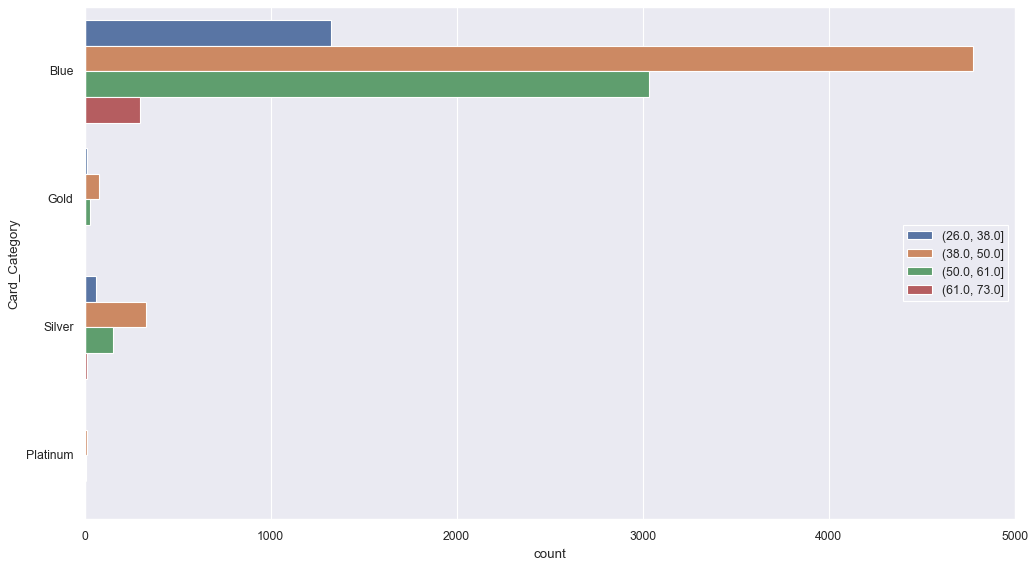

In [11]:
# Categorizing of Customer_Age into 4 categories
df['Customer_Age_Categorized'] = pd.cut(df['Customer_Age'], bins=4, precision=0) 
plt.figure(figsize=(15,8))
sns.countplot(y='Card_Category', hue='Customer_Age_Categorized', data = df)
plt.legend(loc = 'center right')

Graph above says that most of customers are using blue card, and Age between 38 - 50 year old is dominant at every categories.

In [12]:
df.select_dtypes(include='int64').columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct'],
      dtype='object')

Now, we also want to get some insight from count (Integer) features, such as **Customer_Age, Dependent_count,Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Total_Revolving_Bal, Total_Trans_Amt, and Total_Trans_Ct**

In [13]:
df.groupby(['Attrition_Flag','Income_Category'])['Total_Relationship_Count','Total_Revolving_Bal',                            'Total_Trans_Amt','Total_Trans_Ct'].sum()

Total_Relationship_Count  \
Attrition_Flag    Income_Category                             
Attrited Customer $120K +                               409   
                  $40K - $60K                           878   
                  $60K - $80K                           613   
                  $80K - $120K                          705   
                  Less than $40K                       2123   
                  Unknown                               608   
Existing Customer $120K +                              2338   
                  $40K - $60K                          5894   
                  $60K - $80K                          4762   
                  $80K - $120K                         5154   
                  Less than $40K                      11492   
                  Unknown                              3634   

                                   Total_Revolving_Bal  Total_Trans_Amt  \
Attrition_Flag    Income_Category                                         
Attrited Customer $120K +                        85407           427527   
                  $40K - $60K                   172016           811029   
                  $60K - $80K                   107579           613566   
                  $80K - $120K                  183586           905229   
                  Less than $40K                419902          1753529   
                  Unknown                       126193           524727   
Existing Customer $120K +                       803130          2865396   
                  $40K - $60K                  1925854          7075029   
                  $60K - $80K                  1511722          5626333   
                  $80K - $120K                 1668740          5976115   
                  Less than $40K               3657930         13784610   
                  Unknown                      1113759          4237092   

                                   Total_Trans_Ct  
Attrition_Flag    Income_Category                  
Attrited Customer $120K +                    5752  
                  $40K - $60K               12090  
                  $60K - $80K                8474  
                  $80K - $120K              11488  
                  Less than $40K            27048  
                  Unknown                    8255  
Existing Customer $120K +                   40561  
                  $40K - $60K              104261  
                  $60K - $80K               80199  
                  $80K - $120K              84751  
                  Less than $40K           208529  
                  Unknown                   65416

Attrited Customer with **incoming less than 40k usd**, have big number of **Total_Relationship_Count, Total_Revolving_Bal, Total_Trans_Amt, and Total_Trans_Ct**. It does also happen in existing Customer.

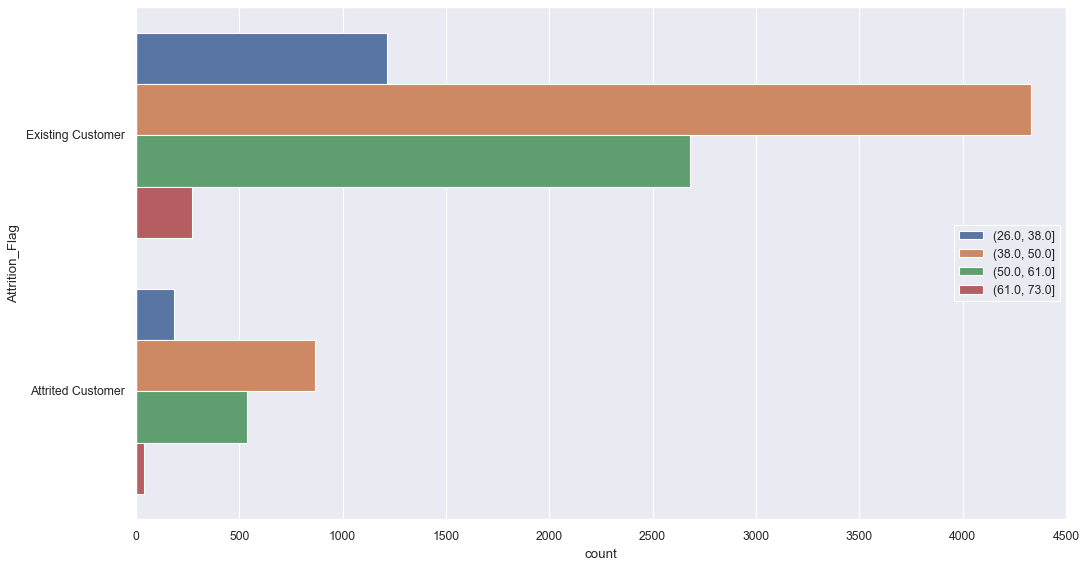

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(y='Attrition_Flag', hue='Customer_Age_Categorized', data = df)
plt.legend(loc = 'center right')

Attrition_Flag     Income_Category
Attrited Customer  Less than $40K      612
                   $40K - $60K         271
                   $80K - $120K        242
                   $60K - $80K         189
                   Unknown             187
                   $120K +             126
Existing Customer  Less than $40K     2949
                   $40K - $60K        1519
                   $80K - $120K       1293
                   $60K - $80K        1213
                   Unknown             925
                   $120K +             601
Name: Income_Category, dtype: int64

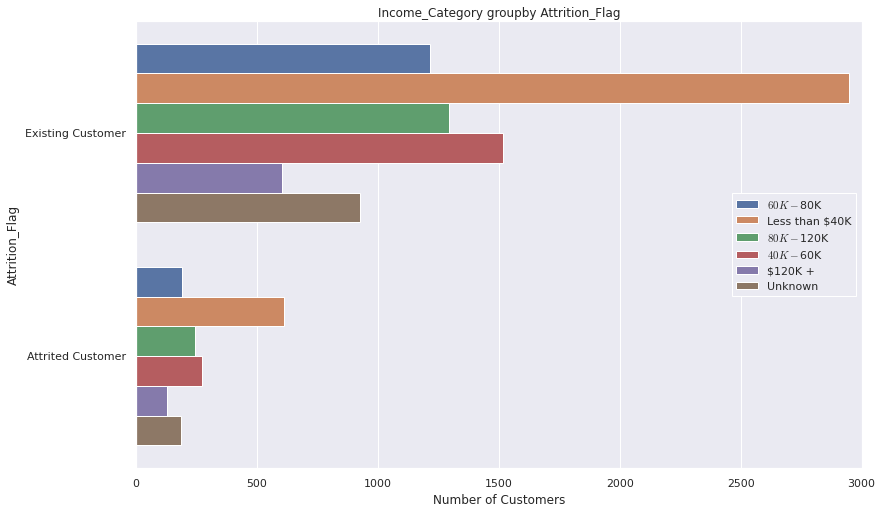

In [15]:
# Bar chart Income_Category groupby Attrition_Flag 
plt.figure(figsize=(13,8))
sns.countplot(y='Attrition_Flag', hue='Income_Category', data = df)
plt.legend(loc = 'center right')
plt.xlabel('Number of Customers')
plt.ylabel('Attrition_Flag')
plt.title('Income_Category groupby Attrition_Flag')

# Table Income_Category groupby Attrition_Flag 
df.groupby('Attrition_Flag')['Income_Category'].value_counts()

Customer_Age_Categorized  Income_Category
(26.0, 38.0]              Less than $40K      537
                          $40K - $60K         275
                          Unknown             179
                          $60K - $80K         178
                          $80K - $120K        161
                          $120K +              70
(38.0, 50.0]              Less than $40K     1768
                          $40K - $60K         943
                          $80K - $120K        833
                          $60K - $80K         805
                          Unknown             542
                          $120K +             306
(50.0, 61.0]              Less than $40K     1109
                          $80K - $120K        531
                          $40K - $60K         498
                          $60K - $80K         388
                          $120K +             350
                          Unknown             342
(61.0, 73.0]              Less than $40K      147
        

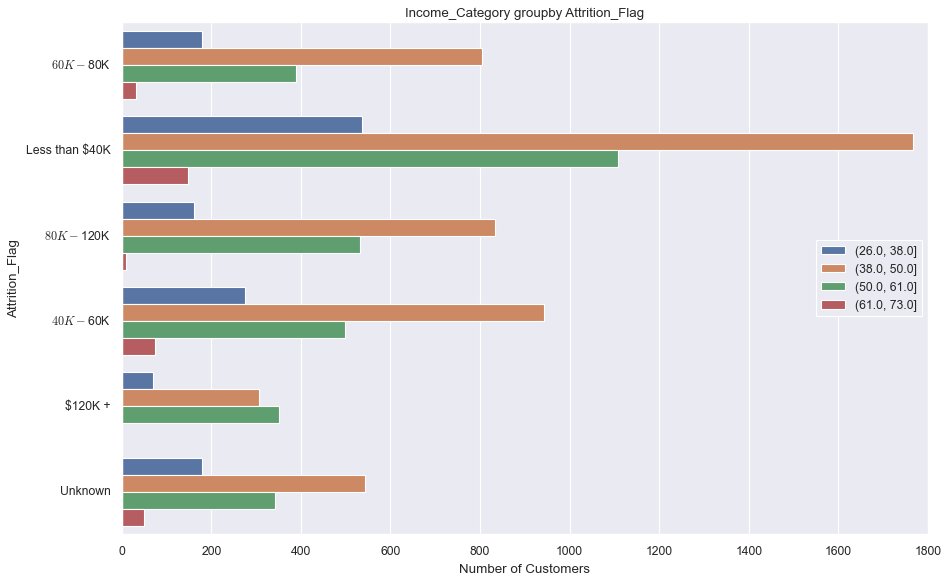

In [15]:
# Bar chart Income_Category groupby Attrition_Flag 
plt.figure(figsize=(13,8))
sns.countplot(y='Income_Category', hue='Customer_Age_Categorized', data = df)
plt.legend(loc = 'center right')
plt.xlabel('Number of Customers')
plt.ylabel('Attrition_Flag')
plt.title('Income_Category groupby Attrition_Flag')

# Table Income_Category groupby Attrition_Flag 
df.groupby('Customer_Age_Categorized')['Income_Category'].value_counts()

Based on some graphs above, we can conclude that most customers have age **between 38 - 50 year old**. It also imply that many of them are having **income less than 40k usd**. 

## Data Preprocessing


In [16]:
df['Attrition_Flag'].value_counts().keys()

Index(['Existing Customer', 'Attrited Customer'], dtype='object')

Before applying mechine learning model in order to clasify **Attrition_Flag (Existing Customer :0, Attrited Customer: 1)**, we are going to prepare the data (cleaning data) so that it will be easy to use into algorithm.

In [17]:
# Remove 'Unknown' Observation and 'CLIENTNUM' column  
df.replace({'Unknown': np.nan}, inplace=True)
df.dropna(inplace=True) # Remove 'Unknown' observation
df.drop(['CLIENTNUM'], axis=1, inplace=True) # Delete 'CLIENTNUM' column
print(df.shape)
df.head(5)

(7081, 21)


,Attrition_Flag,Customer_Age,Gender,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age_Categorized
0,Existing Customer,45,M,...,1.625,0.061,"(38.0, 50.0]"
1,Existing Customer,49,F,...,3.714,0.105,"(38.0, 50.0]"
2,Existing Customer,51,M,...,2.333,0.000,"(50.0, 61.0]"
4,Existing Customer,40,M,...,2.500,0.000,"(38.0, 50.0]"
5,Existing Customer,44,M,...,0.846,0.311,"(38.0, 50.0]"


In [18]:
# Change categorical variables into dummy variables
df2 = pd.concat([df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1}),
                df['Gender'].replace({'M': 0, 'F':1}),
                pd.get_dummies(df['Education_Level']), 
                pd.get_dummies(df['Marital_Status']), 
                pd.get_dummies(df['Income_Category']), 
                pd.get_dummies(df['Card_Category']),
                df.select_dtypes(include=['int64','float64'])], axis=1)

df2.drop(['Uneducated','Divorced','$120K +','Platinum'], axis=1, inplace=True) # Delete because of base categories

As we can see that some of our features are categorical variables, therefore we have to make dummy variables instead of categorical features.

In [19]:
df2.columns

Index(['Attrition_Flag', 'Gender', 'College', 'Doctorate', 'Graduate',
       'High School', 'Post-Graduate', 'Married', 'Single', '$40K - $60K',
       '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Blue', 'Gold',
       'Silver', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Here is final dataset, which is **'Attrition_Flag'** as output, and the others are input variables

## Data Modeling 1: Random Forest (Default Hyperparameter)

In clasification problem, many machine learning method are used, one of them is Random forest. This algorithm is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result. **Why do we use this algorithm?** bacause Random forest is flexible, easy to use machine learning algorithm that produces a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity (it can be used for both classification and regression tasks).

In [20]:
# Spliting dataset into training and testing
x = df2.drop(['Attrition_Flag'], axis=1)
y = df2['Attrition_Flag']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Proportion of training set :")
print(y_train.value_counts())
print("Proportion of testing set :")
print(y_test.value_counts())

Proportion of training set :
0    4763
1     901
Name: Attrition_Flag, dtype: int64
Proportion of testing set :
0    1205
1     212
Name: Attrition_Flag, dtype: int64


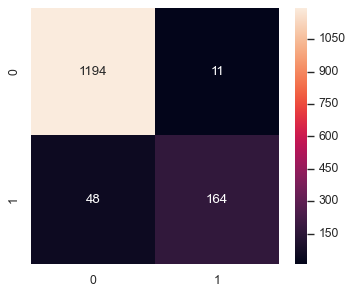

Random Forest Classifier :

	 The Training model accuracy :1.0
	 The Test model accuracy: 0.958362738179252
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1205
           1       0.94      0.77      0.85       212

    accuracy                           0.96      1417
   macro avg       0.95      0.88      0.91      1417
weighted avg       0.96      0.96      0.96      1417



In [21]:
model1 = RandomForestClassifier(random_state= 0)
model1.fit(x_train, y_train)
yhat = model1.predict(x_test)
plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, yhat)
sns.heatmap(cf_mat, annot=True, fmt='g')
plt.show()

print('Random Forest Classifier :\n\n\t',
     f'The Training model accuracy :{model1.score(x_train, y_train)}\n\t', 
     f'The Test model accuracy: {model1.score(x_test, y_test)}')
print(classification_report(y_test, yhat))

by using hyperparameter from python which are **criterion ='gini', n_estimators=100, max_depth=None, max_features = 'auto', min_samples_leaf = 1,** and **min_samples_split = 2 default from python**, we got accuracy **95.8%**, sensitivity/recall **77.0%**, and precision **94.0%**. it's quite good so far. But to be honest, we can improve accuracy by doing some treatments, here we try to increase accuracy in choosing hyperparameter by **Randomized SearchCV**.

## Data Modeling 2: Improving Random Forest (Randomized SearchCV)

Randomized search is the most widely used strategies for hyper-parameter optimization. Many papers showed empirically and theoretically that randomly chosen trials are more efficient for hyper-parameter optimization than trials on a grid. In Random Search, we create a grid of hyperparameters and train/test our model on just some random combination of these hyperparameters. In this example, I additionally decided to perform Cross-Validation on the training set.

We can now start implementing Random Search by first defying a grid of hyperparameters which will be randomly sampled when calling RandomizedSearchCV(). For this example, I decided to divide our training set into 5 Folds (cv = 5) and select 20 as the number of combinations to sample (n_iter = 20). Using the scikit-learn best_estimator_ attribute, we can then retrieve the set of hyperparameters which performed best during training to test our model.

In [35]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10, 11, 12],
               'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
               'n_estimators': list(np.linspace(100, 1200, 5, dtype = int))}

clf = RandomForestClassifier()
model2 = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 20, 
                            cv = 5, verbose= 5, n_jobs = -1)
model2.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:   44.1s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   52.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 142, 274, 406, 538,
                                                      671, 803, 935, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [4, 5, 6, 7, 8, 9,
                                                             10, 11, 12],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9, 10, 11, 12, 13,
                                                              14],
                                        'n_estimators': [100, 375, 650, 925,
 

RandomForestClassifier(criterion='entropy', max_depth=1067, max_features=None,
                       min_samples_leaf=4, min_samples_split=8,
                       n_estimators=650)


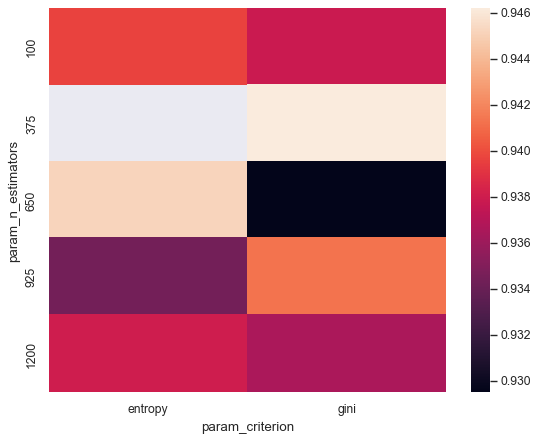

In [36]:
table = pd.pivot_table(pd.DataFrame(model2.cv_results_), values='mean_test_score', index='param_n_estimators', 
                       columns='param_criterion')
sns.heatmap(table)
print(model2.best_estimator_)

According to Randomized SearchCV above, we got the best hyperparameter are **criterion='entropy', n_estimators=650, max_depth=1067, max_features = None, min_samples_leaf = 4,** and **min_samples_split = 8**.

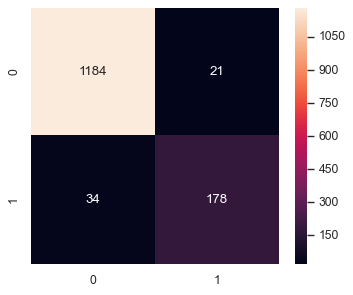

Random Forest Classifier 2:

	 The Test model accuracy: 0.9611856033874383
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1205
           1       0.89      0.84      0.87       212

    accuracy                           0.96      1417
   macro avg       0.93      0.91      0.92      1417
weighted avg       0.96      0.96      0.96      1417



In [37]:
yhat2 = model2.best_estimator_.predict(x_test)
plt.figure(figsize=(5, 4))
cf_mat2 = confusion_matrix(y_test, yhat2)
sns.heatmap(cf_mat2, annot=True, fmt='g')
plt.show()

print('Random Forest Classifier 2:\n\n\t',  
     f'The Test model accuracy: {model2.best_estimator_.score(x_test, y_test)}')
print(classification_report(y_test, yhat2))

By using the best hyperparameter from Randomized SearchCV, we got accuracy **96.1%**, sensitivity/recall **84.0%**, and precision **89.0%**. This **(model 2)** is bit better than previous one **(model 1)**.

## Comparison of ROC Curve of Both Models 

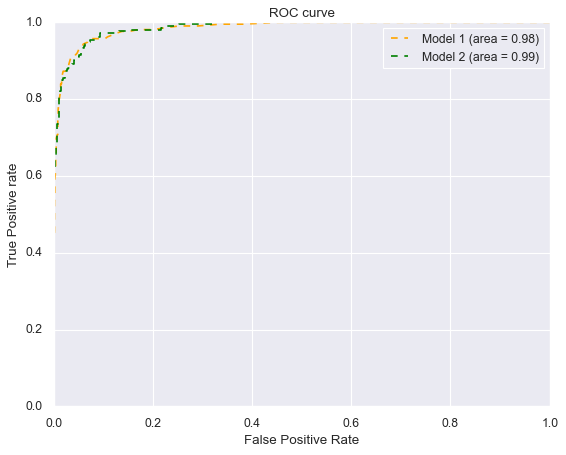

In [42]:
# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Model 1 (area = %0.2f)' % auc_score1)
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Model 2 (area = %0.2f)' % auc_score2)

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

As we can see that ROC curves of both models are not significantly different. We also got AUC for **model 1 = 0.98** and **model 2 = 0.99**. Even it's so, we still believe that hyperparameters have effected big enough to the accuracy of the model in circumstance situation.

## Feature Importance

Text(0.5, 0, 'Random Forest Feature Importance')

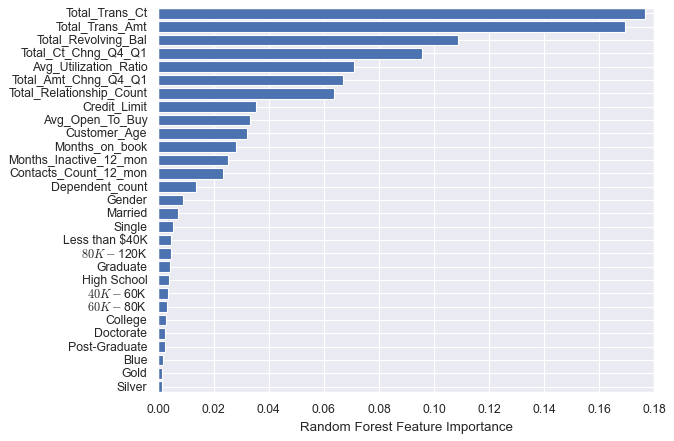

In [43]:
sorted_idx = model1.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], model1.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

According to the graph, we can get that 5 most dominant/important features are **Total_Trans_Amt, Total_Trans_Ct, Total_Revolving_Bal, Total_Ct_Chng_Q4_Q1** and **Avg_Utilization_Ratio**. Therefore the company can put effort more through these features.